# Beyond Hello World, A Computer Vision Example

![Fashion MNIST](./img/fashion-mnist.png)

Reference: https://www.tensorflow.org/tutorials/keras/classification

The images are 28x28 NumPy arrays, with pixel values ranging from 0 to 255. The *labels* are an array of integers, ranging from 0 to 9. These correspond to the *class* of clothing the image represents:

![Fashion MNIST](./img/fashion-mnist-classes.png)

Each image is mapped to a single label. Since the *class names* are not included with the dataset, store them here to use later when plotting the images:
```
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
```

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
mnist = tf.keras.datasets.fashion_mnist

In [3]:
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()
print("training_images = {}".format(training_images.shape))
print("training_labels = {}".format(training_labels.shape))
print("test_images = {}".format(test_images.shape))
print("test_labels = {}".format(test_labels.shape))

training_images = (60000, 28, 28)
training_labels = (60000,)
test_images = (10000, 28, 28)
test_labels = (10000,)


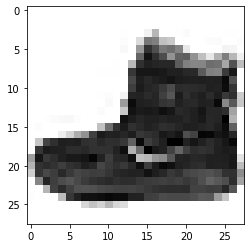

In [4]:
plt.imshow(training_images[0], cmap='gray_r'); # inverted gray

In [5]:
print(training_labels[0])
print(training_images[0])

9
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1   1   0 200 232 

## Basic Model

In [6]:
# Normalizing (or scaling)
training_images = training_images / 255.0
test_images = test_images / 255.0

In [7]:
print(training_labels[0])
print(training_images[0])

9
[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.00392157 0.  

In [8]:
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(), # input_shape=(28, 28) 
                                   tf.keras.layers.Dense(128, activation=tf.nn.relu),
                                   tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

In [9]:
model.compile(optimizer = tf.optimizers.Adam(), # or simply optimizer='adam'
             loss = 'sparse_categorical_crossentropy',
             metrics=['accuracy'])

model.fit(training_images, training_labels, epochs=5)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 3s 56us/sample - loss: 0.4991 - accuracy: 0.8250
Epoch 2/5
60000/60000 [==============================] - 3s 48us/sample - loss: 0.3751 - accuracy: 0.8646
Epoch 3/5
60000/60000 [==============================] - 3s 53us/sample - loss: 0.3374 - accuracy: 0.8766
Epoch 4/5
60000/60000 [==============================] - 3s 50us/sample - loss: 0.3127 - accuracy: 0.8854
Epoch 5/5
60000/60000 [==============================] - 3s 53us/sample - loss: 0.2938 - accuracy: 0.8916


In [10]:
model.evaluate(test_images, test_labels, verbose=2)

10000/1 - 0s - loss: 0.2490 - accuracy: 0.8811


[0.33393328174352643, 0.8811]

In [11]:
classification_prob = model.predict(tf.expand_dims(test_images[0], axis=0))
print(classification_prob)
print(tf.math.argmax(classification_prob[0]))

[[2.6439833e-05 1.1717050e-07 3.6635362e-07 1.4042611e-07 4.0740423e-07
  3.1953403e-03 6.8336285e-06 6.4588010e-02 1.8019079e-04 9.3200213e-01]]
tf.Tensor(9, shape=(), dtype=int64)


Note: `model` accepts only the form of (None, 28, 28) so we need to expand one dimension along with axis `0`:
* test_images[0].shape: (28, 28)
* tf.expand_dims(test_images[0], axis=0).shape): (1, 28, 28)

In [12]:
classification_prob = model.predict(tf.stack([test_images[0], test_images[1]]))
print(classification_prob)
print(tf.math.argmax(classification_prob, axis=1))

[[2.64398550e-05 1.17170266e-07 3.66354300e-07 1.40425954e-07
  4.07403832e-07 3.19534284e-03 6.83362805e-06 6.45880997e-02
  1.80191128e-04 9.32002008e-01]
 [2.17861507e-05 1.17527946e-10 9.90410924e-01 6.15839113e-09
  7.48664746e-03 1.72514089e-13 2.08058441e-03 2.27153247e-14
  1.30825750e-08 6.90817096e-16]]
tf.Tensor([9 2], shape=(2,), dtype=int64)


**Understanding `Input` and `Output` shape is Important!**

![Input and Ouput Shape](img/stack_argmax.png)

## Using Callback function
* `loss` will be logged by default  
* need to add `metrics=['accuracy']` in order to access `accuracy`

In [32]:
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if logs.get('accuracy') > 0.88:
            print("\nReached 88% accuracy so cancelling training!")
            self.model.stop_training = True

In [33]:
callbacks = myCallback()

In [34]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(512, activation=tf.nn.relu),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(training_images, training_labels, epochs=5, callbacks=[callbacks], verbose=2)

Train on 60000 samples
Epoch 1/5
60000/60000 - 5s - loss: 0.4715 - accuracy: 0.8331
Epoch 2/5
60000/60000 - 6s - loss: 0.3567 - accuracy: 0.8704
Epoch 3/5
60000/60000 - 7s - loss: 0.3242 - accuracy: 0.8800
Epoch 4/5

Reached 88% accuracy so cancelling training!
60000/60000 - 7s - loss: 0.3006 - accuracy: 0.8881


In [36]:
print(history.history)

{'loss': [0.47153526089986164, 0.35666005692481995, 0.32420468151569365, 0.3006202197253704], 'accuracy': [0.83306664, 0.87035, 0.8799667, 0.88815]}
